## Libraries

In [1]:
import numpy as np
from Contents.params import*
from Contents.reinhard import reinhard_operator
from Contents.irradiance import calc_irradiance
from Contents.read_images import read_list_of_images
from Contents.gamma_correction import gamma_correction
from Contents.curve_calibration import get_curve_calibration
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import NullLocator

## Read images

In [2]:
images = read_list_of_images(
    list_of_files = list_of_files, 
    exposures = exposures)

## Plotting images

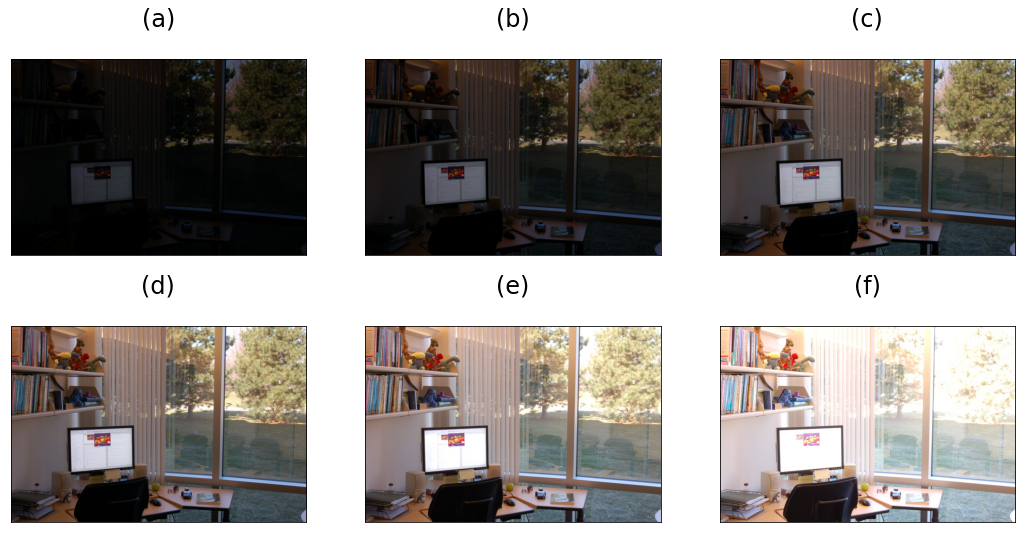

In [3]:
fig, axs = plt.subplots(2,3, figsize = (18,9))

v = list(images.keys())

axs[0][0].imshow(images[v[0]])
axs[0][1].imshow(images[v[1]])
axs[0][2].imshow(images[v[2]])
axs[1][0].imshow(images[v[3]])
axs[1][1].imshow(images[v[4]])
axs[1][2].imshow(images[v[5]])

titles = [['(a)\n', '(b)\n', '(c)\n'], ['(d)\n', '(e)\n', '(f)\n']]

for axss, titless in zip(axs,titles):
    for ax, title in zip(axss, titless):
        
        # Set title
        
        ax.set_title(title, fontsize = 24)
        
        # Remove axis
        
        ax.xaxis.set_major_locator(NullLocator())
        ax.yaxis.set_major_locator(NullLocator())
        
plt.savefig("Images/montage.png")

## Read calibration curve

In [4]:
calibration_curve = get_curve_calibration(filepath = "curve.m")

## Irradiance calculate

In [5]:
Em = calc_irradiance(
    images = images, 
    calibration_curve = calibration_curve)

## Get the HDR image

In [6]:
mult_exposures = np.array([20,40,60,80,100,120])

images_HDR = []

for exposure in mult_exposures:
    temp = Em*exposure
    temp = gamma_correction(image = temp, gamma = gamma).astype(int)
    images_HDR.append(temp)

## Plotting image HDR for diferentes exposures

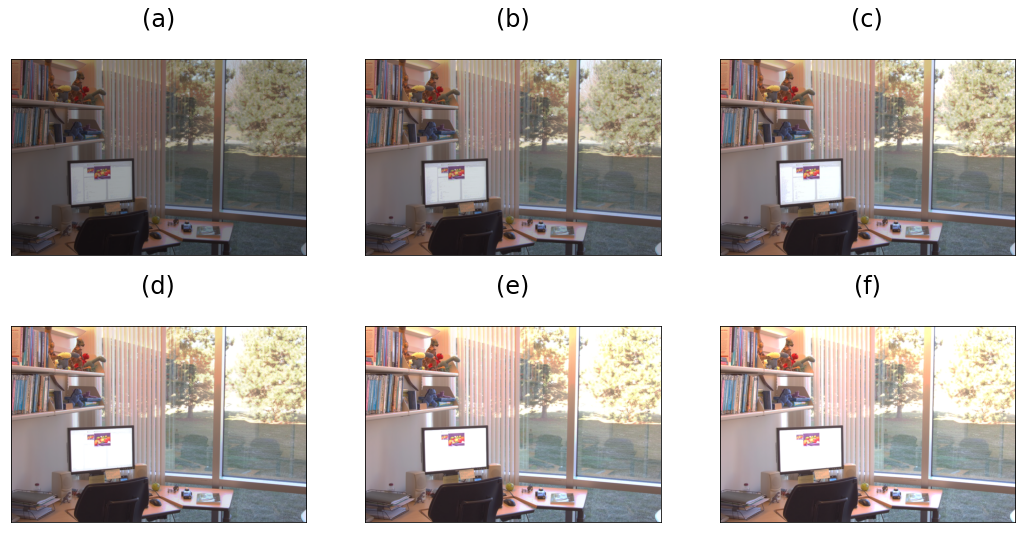

In [7]:
fig, axs = plt.subplots(2,3, figsize = (18,9))

axs[0][0].imshow(images_HDR[0])
axs[0][1].imshow(images_HDR[1])
axs[0][2].imshow(images_HDR[2])
axs[1][0].imshow(images_HDR[3])
axs[1][1].imshow(images_HDR[4])
axs[1][2].imshow(images_HDR[5])

titles = [['(a)\n', '(b)\n', '(c)\n'], ['(d)\n', '(e)\n', '(f)\n']]

for axss, titless in zip(axs,titles):
    for ax, title in zip(axss, titless):
        
        # Set title
        
        ax.set_title(title, fontsize = 24)
        
        # Remove axis
        
        ax.xaxis.set_major_locator(NullLocator())
        ax.yaxis.set_major_locator(NullLocator())
        
plt.savefig("Images/HDR_diff_exposures.png")

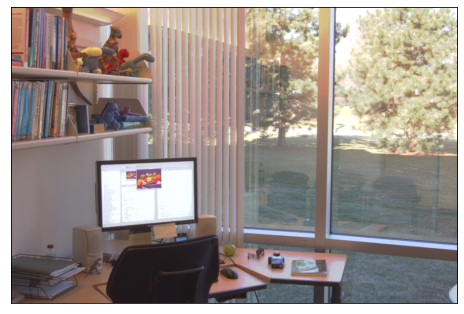

In [8]:
fig, ax = plt.subplots(figsize = (8,6))

ax.imshow(images_HDR[2])

plt.gca().xaxis.set_major_locator(NullLocator())
plt.gca().yaxis.set_major_locator(NullLocator())

plt.savefig("Images/HDR.png", bbox_inches = 'tight')

## Reinhard Operator

In [9]:
Lg = reinhard_operator(image = images_HDR[2].copy())

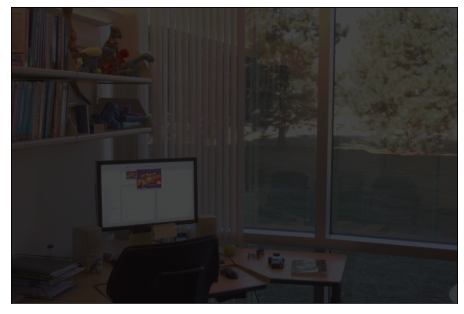

In [10]:
fig, ax = plt.subplots(figsize = (8,6))

ax.imshow(Lg)

plt.gca().xaxis.set_major_locator(NullLocator())
plt.gca().yaxis.set_major_locator(NullLocator())

plt.savefig("Images/LG.png")